In [60]:
import pandas as pd
import numpy as np
import sys
from matplotlib import pyplot as plt
import os

cmap = plt.get_cmap('Set1')

def getStat(filename, stat, suite, app, i, j, k):
    filename = os.path.join(filename).replace('\\','/')
    #print(stat)
    #print(filename)
    try:
        if suite=="gapbs" and app=="bfs" :
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < (i-1):
                        x = x+1
                    elif stat in l and x == (i-1):
                        return l
                return 0.0 #for cases where stat was not found
        elif suite=="gapbs" and app=="cc" :
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < (j-1):
                        x = x+1
                    elif stat in l and x == (j-1):
                        return l
                return 0.0 #for cases where stat was not found
        elif suite=="gapbs" and app=="sssp" :
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < (k-1):
                        x = x+1
                    elif stat in l and x == (k-1):
                        return l
                return 0.0 #for cases where stat was not found
        # elif suite=="npb" and app=="ep" :
        #     x = 0
        #     with open(filename) as f:
        #         readlines = f.readlines()
        #         for l in readlines:
        #             if stat in l and x < (3-1):
        #                 x = x+1
        #             elif stat in l and x == (3-1):
        #                 return l
        #         return 0.0 #for cases where stat was not found
        else: 
            x = 0
            with open(filename) as f:
                readlines = f.readlines()
                for l in readlines:
                    if stat in l and x < 9:
                        x = x+1
                    elif stat in l and x == 9:
                        return l
                return 0.0 #for cases where stat was not found
    except: #for cases where the file was not found
        return 0.0

Stats = ['simSeconds ',
'hostSeconds ',
'system.mem_ctrl.readReqs ',
'system.mem_ctrl.writeReqs ',
'system.mem_ctrl.servicedByWrQ ',
'system.mem_ctrl.mergedWrBursts ',
'system.mem_ctrl.numTotHits ',
'system.mem_ctrl.numTotMisses ',
'system.mem_ctrl.numColdMisses ',
'system.mem_ctrl.numHotMisses ',
'system.mem_ctrl.numRdMissClean ',
'system.mem_ctrl.numRdMissDirty ',
'system.mem_ctrl.numRdHit ',
'system.mem_ctrl.numWrMissClean ',
'system.mem_ctrl.numWrMissDirty ',
'system.mem_ctrl.numWrHit ',
'system.mem_ctrl.numRdHitDirty ',
'system.mem_ctrl.numRdHitClean ',
'system.mem_ctrl.numWrHitDirty ',
'system.mem_ctrl.numWrHitClean ',
'system.o3Cpu0.thread_0.numInsts ',
'system.o3Cpu1.thread_0.numInsts ',
'system.o3Cpu2.thread_0.numInsts ',
'system.o3Cpu3.thread_0.numInsts ',
'system.o3Cpu4.thread_0.numInsts ',
'system.o3Cpu5.thread_0.numInsts ',
'system.o3Cpu6.thread_0.numInsts ',
'system.o3Cpu7.thread_0.numInsts ',
'system.mem_ctrl.avgRdBWSys ',
'system.mem_ctrl.avgWrBWSys ',
'system.mem_ctrl.avgORBLen ',
'system.far_mem_ctrl.avgRdBWSys ',
'system.far_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.avgRdBWSys ',
'system.loc_mem_ctrl.avgWrBWSys ',
'system.loc_mem_ctrl.dram.readBursts ',
'system.loc_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram_2.readBursts ',
'system.loc_mem_ctrl.dram_2.writeBursts ',
'system.far_mem_ctrl.dram.readBursts ',
'system.far_mem_ctrl.dram.writeBursts ',
'system.loc_mem_ctrl.dram.avgRdBW ',
'system.loc_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram_2.avgRdBW ',
'system.loc_mem_ctrl.dram_2.avgWrBW ',
'system.far_mem_ctrl.dram.avgRdBW ',
'system.far_mem_ctrl.dram.avgWrBW ',
'system.loc_mem_ctrl.dram.busUtil ',
'system.loc_mem_ctrl.dram.busUtilRead ',
'system.loc_mem_ctrl.dram.busUtilWrite ',
'system.loc_mem_ctrl.dram_2.busUtil ',
'system.loc_mem_ctrl.dram_2.busUtilRead ',
'system.loc_mem_ctrl.dram_2.busUtilWrite ',
'system.far_mem_ctrl.dram.busUtil ',
'system.far_mem_ctrl.dram.busUtilRead ',
'system.far_mem_ctrl.dram.busUtilWrite ',
'system.far_mem_ctrl.dram.bytesRead  ',
'system.far_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram.bytesRead  ',
'system.loc_mem_ctrl.dram.bytesWritten  ',
'system.loc_mem_ctrl.dram_2.bytesRead  ',
'system.loc_mem_ctrl.dram_2.bytesWritten  ',
'system.mem_ctrl.avgTimeTagCheckRes ',
'system.mem_ctrl.avgTimeTagCheckResRd ',
'system.mem_ctrl.avgTimeTagCheckResWr ',
'system.mem_ctrl.avgPktRespTimeRd ',
'system.mem_ctrl.avgPktRespTimeWr ',
'system.mem_ctrl.avgPktORBTime ',
'system.mem_ctrl.avgPktORBTimeRd ',
'system.mem_ctrl.avgPktORBTimeWr '
          ]

dfCols = [
         'app',
         'simSeconds',
         'hostSeconds',
         'readReqs',
         'writeReqs',
         'servicedByWrQ',
         'mergedWrBursts',
         'numTotHits',
         'numTotMisses',
         'numColdMisses',
         'numHotMisses',
         'numRdMissClean',
         'numRdMissDirty',
         'numRdHit',
         'numWrMissClean',
         'numWrMissDirty',
         'numWrHit',
         'numRdHitDirty',
         'numRdHitClean',
         'numWrHitDirty',
         'numWrHitClean',
         'numInsts0',
         'numInsts1',
         'numInsts2',
         'numInsts3',
         'numInsts4',
         'numInsts5',
         'numInsts6',
         'numInsts7',
         'avgRdBWSys',
         'avgWrBWSys',
         'avgORBLen',
         'farAvgRdBWSys',
         'farAvgWrBWSys',
         'locAvgRdBWSys',
         'locAvgWrBWSys',
         'readBursts1',
         'writeBursts1',
         'readBursts2',
         'writeBursts2',
         'readBursts3',
         'writeBursts3',
         'loc1AvgRdBW',
         'loc1AvgWrBW',
         'loc2AvgRdBW',
         'loc2AvgWrBW',
         'farAvgRdBW',
         'farAvgWrBW',
         'loc1BusUtil',
         'loc1BusUtilRead',
         'loc1BusUtilWrite',
         'loc2BusUtil',
         'loc2BusUtilRead',
         'loc2BusUtilWrite',
         'farBusUtil',
         'farBusUtilRead',
         'farBusUtilWrite',
         'farBytesRead',
         'farBytesWritten',
         'loc1BytesRead',
         'loc1BytesWritten',
         'loc2BytesRead',
         'loc2BytesWritten',
         'avgTimeTagCheckRes',
         'avgTimeTagCheckResRd',
         'avgTimeTagCheckResWr',
         'avgPktRespTimeRd',
         'avgPktRespTimeWr',
         'avgPktORBTime',
         'avgPktORBTimeRd',
         'avgPktORBTimeWr'

         ]

def gmean(x, size):
    y = 1
    for i in range(size):
        y = x[i] * y
    return y**(1/size)

In [34]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/GAPBS/50ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 29, 28, 12)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_ram_50ns = pd.DataFrame(rows, columns= dfCols)

df_g_ram_50ns['totNumInsts'] = df_g_ram_50ns['numInsts0'].astype(int)+df_g_ram_50ns['numInsts1'].astype(int)+df_g_ram_50ns['numInsts2'].astype(int)+df_g_ram_50ns['numInsts3'].astype(int)+df_g_ram_50ns['numInsts4'].astype(int)+df_g_ram_50ns['numInsts5'].astype(int)+df_g_ram_50ns['numInsts6'].astype(int)+df_g_ram_50ns['numInsts7'].astype(int)
df_g_ram_50ns['totBW'] = (df_g_ram_50ns['avgRdBWSys'].astype(float)+df_g_ram_50ns['avgWrBWSys'].astype(float))/1000000000
df_g_ram_50ns['coldRate'] = (df_g_ram_50ns['numColdMisses'].astype(float) / df_g_ram_50ns['numTotMisses'].astype(float)) *100
df_g_ram_50ns['injRate'] = (df_g_ram_50ns['readReqs'].astype(float) + df_g_ram_50ns['writeReqs'].astype(float))*64/1000000000 / df_g_ram_50ns['simSeconds'].astype(float)
df_g_ram_50ns['BIPS'] = (df_g_ram_50ns['totNumInsts'].astype(float)/1000000000)/df_g_ram_50ns['simSeconds'].astype(float)

df_g_ram_50ns['accAmp'] =  (df_g_ram_50ns['farBytesRead'].astype(float) + df_g_ram_50ns['farBytesWritten'].astype(float) +
                             df_g_ram_50ns['loc1BytesRead'].astype(float) + df_g_ram_50ns['loc1BytesWritten'].astype(float) + 
                             df_g_ram_50ns['loc2BytesRead'].astype(float) + df_g_ram_50ns['loc2BytesWritten'].astype(float)) / (df_g_ram_50ns['readReqs'].astype(float) * 64 + df_g_ram_50ns['writeReqs'].astype(float) * 64)

df_g_ram_50ns['BWBloat'] =  (df_g_ram_50ns['loc1AvgRdBW'].astype(float) + df_g_ram_50ns['loc1AvgWrBW'].astype(float) +
                             df_g_ram_50ns['loc2AvgRdBW'].astype(float) + df_g_ram_50ns['loc2AvgWrBW'].astype(float) +
                             df_g_ram_50ns['farAvgRdBW'].astype(float) + df_g_ram_50ns['farAvgWrBW'].astype(float)) / ((df_g_ram_50ns['avgRdBWSys'].astype(float) + df_g_ram_50ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_ram_50ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_ram_50ns.csv")

In [29]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/NPB/50ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_ram_50ns = pd.DataFrame(rows, columns= dfCols)

df_n_ram_50ns['totNumInsts'] = df_n_ram_50ns['numInsts0'].astype(int)+df_n_ram_50ns['numInsts1'].astype(int)+df_n_ram_50ns['numInsts2'].astype(int)+df_n_ram_50ns['numInsts3'].astype(int)+df_n_ram_50ns['numInsts4'].astype(int)+df_n_ram_50ns['numInsts5'].astype(int)+df_n_ram_50ns['numInsts6'].astype(int)+df_n_ram_50ns['numInsts7'].astype(int)
df_n_ram_50ns['totBW'] = (df_n_ram_50ns['avgRdBWSys'].astype(float)+df_n_ram_50ns['avgWrBWSys'].astype(float))/1000000000
df_n_ram_50ns['coldRate'] = (df_n_ram_50ns['numColdMisses'].astype(float) / df_n_ram_50ns['numTotMisses'].astype(float)) *100
df_n_ram_50ns['injRate'] = (df_n_ram_50ns['readReqs'].astype(float) + df_n_ram_50ns['writeReqs'].astype(float))*64/1000000000 / df_n_ram_50ns['simSeconds'].astype(float)
df_n_ram_50ns['BIPS'] = (df_n_ram_50ns['totNumInsts'].astype(float)/1000000000)/df_n_ram_50ns['simSeconds'].astype(float)

df_n_ram_50ns['accAmp'] =  (df_n_ram_50ns['farBytesRead'].astype(float) + df_n_ram_50ns['farBytesWritten'].astype(float) +
                             df_n_ram_50ns['loc1BytesRead'].astype(float) + df_n_ram_50ns['loc1BytesWritten'].astype(float) + 
                             df_n_ram_50ns['loc2BytesRead'].astype(float) + df_n_ram_50ns['loc2BytesWritten'].astype(float)) / (df_n_ram_50ns['readReqs'].astype(float) * 64 + df_n_ram_50ns['writeReqs'].astype(float) * 64)

df_n_ram_50ns['BWBloat'] =  (df_n_ram_50ns['loc1AvgRdBW'].astype(float) + df_n_ram_50ns['loc1AvgWrBW'].astype(float) +
                             df_n_ram_50ns['loc2AvgRdBW'].astype(float) + df_n_ram_50ns['loc2AvgWrBW'].astype(float) +
                             df_n_ram_50ns['farAvgRdBW'].astype(float) + df_n_ram_50ns['farAvgWrBW'].astype(float)) / ((df_n_ram_50ns['avgRdBWSys'].astype(float) + df_n_ram_50ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_ram_50ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_ram_50ns.csv")

In [35]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/GAPBS/100ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 27, 27, 12)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_ram_100ns = pd.DataFrame(rows, columns= dfCols)

df_g_ram_100ns['totNumInsts'] = df_g_ram_100ns['numInsts0'].astype(int)+df_g_ram_100ns['numInsts1'].astype(int)+df_g_ram_100ns['numInsts2'].astype(int)+df_g_ram_100ns['numInsts3'].astype(int)+df_g_ram_100ns['numInsts4'].astype(int)+df_g_ram_100ns['numInsts5'].astype(int)+df_g_ram_100ns['numInsts6'].astype(int)+df_g_ram_100ns['numInsts7'].astype(int)
df_g_ram_100ns['totBW'] = (df_g_ram_100ns['avgRdBWSys'].astype(float)+df_g_ram_100ns['avgWrBWSys'].astype(float))/1000000000
df_g_ram_100ns['coldRate'] = (df_g_ram_100ns['numColdMisses'].astype(float) / df_g_ram_100ns['numTotMisses'].astype(float)) *100
df_g_ram_100ns['injRate'] = (df_g_ram_100ns['readReqs'].astype(float) + df_g_ram_100ns['writeReqs'].astype(float))*64/1000000000 / df_g_ram_100ns['simSeconds'].astype(float)
df_g_ram_100ns['BIPS'] = (df_g_ram_100ns['totNumInsts'].astype(float)/1000000000)/df_g_ram_100ns['simSeconds'].astype(float)

df_g_ram_100ns['accAmp'] =  (df_g_ram_100ns['farBytesRead'].astype(float) + df_g_ram_100ns['farBytesWritten'].astype(float) +
                             df_g_ram_100ns['loc1BytesRead'].astype(float) + df_g_ram_100ns['loc1BytesWritten'].astype(float) + 
                             df_g_ram_100ns['loc2BytesRead'].astype(float) + df_g_ram_100ns['loc2BytesWritten'].astype(float)) / (df_g_ram_100ns['readReqs'].astype(float) * 64 + df_g_ram_100ns['writeReqs'].astype(float) * 64)

df_g_ram_100ns['BWBloat'] =  (df_g_ram_100ns['loc1AvgRdBW'].astype(float) + df_g_ram_100ns['loc1AvgWrBW'].astype(float) +
                             df_g_ram_100ns['loc2AvgRdBW'].astype(float) + df_g_ram_100ns['loc2AvgWrBW'].astype(float) +
                             df_g_ram_100ns['farAvgRdBW'].astype(float) + df_g_ram_100ns['farAvgWrBW'].astype(float)) / ((df_g_ram_100ns['avgRdBWSys'].astype(float) + df_g_ram_100ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_ram_100ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_ram_100ns.csv")

In [27]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/NPB/100ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_ram_100ns = pd.DataFrame(rows, columns= dfCols)

df_n_ram_100ns['totNumInsts'] = df_n_ram_100ns['numInsts0'].astype(int)+df_n_ram_100ns['numInsts1'].astype(int)+df_n_ram_100ns['numInsts2'].astype(int)+df_n_ram_100ns['numInsts3'].astype(int)+df_n_ram_100ns['numInsts4'].astype(int)+df_n_ram_100ns['numInsts5'].astype(int)+df_n_ram_100ns['numInsts6'].astype(int)+df_n_ram_100ns['numInsts7'].astype(int)
df_n_ram_100ns['totBW'] = (df_n_ram_100ns['avgRdBWSys'].astype(float)+df_n_ram_100ns['avgWrBWSys'].astype(float))/1000000000
df_n_ram_100ns['coldRate'] = (df_n_ram_100ns['numColdMisses'].astype(float) / df_n_ram_100ns['numTotMisses'].astype(float)) *100
df_n_ram_100ns['injRate'] = (df_n_ram_100ns['readReqs'].astype(float) + df_n_ram_100ns['writeReqs'].astype(float))*64/1000000000 / df_n_ram_100ns['simSeconds'].astype(float)
df_n_ram_100ns['BIPS'] = (df_n_ram_100ns['totNumInsts'].astype(float)/1000000000)/df_n_ram_100ns['simSeconds'].astype(float)

df_n_ram_100ns['accAmp'] =  (df_n_ram_100ns['farBytesRead'].astype(float) + df_n_ram_100ns['farBytesWritten'].astype(float) +
                             df_n_ram_100ns['loc1BytesRead'].astype(float) + df_n_ram_100ns['loc1BytesWritten'].astype(float) + 
                             df_n_ram_100ns['loc2BytesRead'].astype(float) + df_n_ram_100ns['loc2BytesWritten'].astype(float)) / (df_n_ram_100ns['readReqs'].astype(float) * 64 + df_n_ram_100ns['writeReqs'].astype(float) * 64)

df_n_ram_100ns['BWBloat'] =  (df_n_ram_100ns['loc1AvgRdBW'].astype(float) + df_n_ram_100ns['loc1AvgWrBW'].astype(float) +
                             df_n_ram_100ns['loc2AvgRdBW'].astype(float) + df_n_ram_100ns['loc2AvgWrBW'].astype(float) +
                             df_n_ram_100ns['farAvgRdBW'].astype(float) + df_n_ram_100ns['farAvgWrBW'].astype(float)) / ((df_n_ram_100ns['avgRdBWSys'].astype(float) + df_n_ram_100ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_ram_100ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_ram_100ns.csv")

In [26]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/GAPBS/250ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 26, 21, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_ram_250ns = pd.DataFrame(rows, columns= dfCols)

df_g_ram_250ns['totNumInsts'] = df_g_ram_250ns['numInsts0'].astype(int)+df_g_ram_250ns['numInsts1'].astype(int)+df_g_ram_250ns['numInsts2'].astype(int)+df_g_ram_250ns['numInsts3'].astype(int)+df_g_ram_250ns['numInsts4'].astype(int)+df_g_ram_250ns['numInsts5'].astype(int)+df_g_ram_250ns['numInsts6'].astype(int)+df_g_ram_250ns['numInsts7'].astype(int)
df_g_ram_250ns['totBW'] = (df_g_ram_250ns['avgRdBWSys'].astype(float)+df_g_ram_250ns['avgWrBWSys'].astype(float))/1000000000
df_g_ram_250ns['coldRate'] = (df_g_ram_250ns['numColdMisses'].astype(float) / df_g_ram_250ns['numTotMisses'].astype(float)) *100
df_g_ram_250ns['injRate'] = (df_g_ram_250ns['readReqs'].astype(float) + df_g_ram_250ns['writeReqs'].astype(float))*64/1000000000 / df_g_ram_250ns['simSeconds'].astype(float)
df_g_ram_250ns['BIPS'] = (df_g_ram_250ns['totNumInsts'].astype(float)/1000000000)/df_g_ram_250ns['simSeconds'].astype(float)

df_g_ram_250ns['accAmp'] =  (df_g_ram_250ns['farBytesRead'].astype(float) + df_g_ram_250ns['farBytesWritten'].astype(float) +
                             df_g_ram_250ns['loc1BytesRead'].astype(float) + df_g_ram_250ns['loc1BytesWritten'].astype(float) + 
                             df_g_ram_250ns['loc2BytesRead'].astype(float) + df_g_ram_250ns['loc2BytesWritten'].astype(float)) / (df_g_ram_250ns['readReqs'].astype(float) * 64 + df_g_ram_250ns['writeReqs'].astype(float) * 64)

df_g_ram_250ns['BWBloat'] =  (df_g_ram_250ns['loc1AvgRdBW'].astype(float) + df_g_ram_250ns['loc1AvgWrBW'].astype(float) +
                             df_g_ram_250ns['loc2AvgRdBW'].astype(float) + df_g_ram_250ns['loc2AvgWrBW'].astype(float) +
                             df_g_ram_250ns['farAvgRdBW'].astype(float) + df_g_ram_250ns['farAvgWrBW'].astype(float)) / ((df_g_ram_250ns['avgRdBWSys'].astype(float) + df_g_ram_250ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_ram_250ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_ram_250ns.csv")

In [25]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/NPB/250ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_ram_250ns = pd.DataFrame(rows, columns= dfCols)

df_n_ram_250ns['totNumInsts'] = df_n_ram_250ns['numInsts0'].astype(int)+df_n_ram_250ns['numInsts1'].astype(int)+df_n_ram_250ns['numInsts2'].astype(int)+df_n_ram_250ns['numInsts3'].astype(int)+df_n_ram_250ns['numInsts4'].astype(int)+df_n_ram_250ns['numInsts5'].astype(int)+df_n_ram_250ns['numInsts6'].astype(int)+df_n_ram_250ns['numInsts7'].astype(int)
df_n_ram_250ns['totBW'] = (df_n_ram_250ns['avgRdBWSys'].astype(float)+df_n_ram_250ns['avgWrBWSys'].astype(float))/1000000000
df_n_ram_250ns['coldRate'] = (df_n_ram_250ns['numColdMisses'].astype(float) / df_n_ram_250ns['numTotMisses'].astype(float)) *100
df_n_ram_250ns['injRate'] = (df_n_ram_250ns['readReqs'].astype(float) + df_n_ram_250ns['writeReqs'].astype(float))*64/1000000000 / df_n_ram_250ns['simSeconds'].astype(float)
df_n_ram_250ns['BIPS'] = (df_n_ram_250ns['totNumInsts'].astype(float)/1000000000)/df_n_ram_250ns['simSeconds'].astype(float)

df_n_ram_250ns['accAmp'] =  (df_n_ram_250ns['farBytesRead'].astype(float) + df_n_ram_250ns['farBytesWritten'].astype(float) +
                             df_n_ram_250ns['loc1BytesRead'].astype(float) + df_n_ram_250ns['loc1BytesWritten'].astype(float) + 
                             df_n_ram_250ns['loc2BytesRead'].astype(float) + df_n_ram_250ns['loc2BytesWritten'].astype(float)) / (df_n_ram_250ns['readReqs'].astype(float) * 64 + df_n_ram_250ns['writeReqs'].astype(float) * 64)

df_n_ram_250ns['BWBloat'] =  (df_n_ram_250ns['loc1AvgRdBW'].astype(float) + df_n_ram_250ns['loc1AvgWrBW'].astype(float) +
                             df_n_ram_250ns['loc2AvgRdBW'].astype(float) + df_n_ram_250ns['loc2AvgWrBW'].astype(float) +
                             df_n_ram_250ns['farAvgRdBW'].astype(float) + df_n_ram_250ns['farAvgWrBW'].astype(float)) / ((df_n_ram_250ns['avgRdBWSys'].astype(float) + df_n_ram_250ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_ram_250ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_ram_250ns.csv")

In [24]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/GAPBS/500ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 21, 20, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_ram_500ns = pd.DataFrame(rows, columns= dfCols)

df_g_ram_500ns['totNumInsts'] = df_g_ram_500ns['numInsts0'].astype(int)+df_g_ram_500ns['numInsts1'].astype(int)+df_g_ram_500ns['numInsts2'].astype(int)+df_g_ram_500ns['numInsts3'].astype(int)+df_g_ram_500ns['numInsts4'].astype(int)+df_g_ram_500ns['numInsts5'].astype(int)+df_g_ram_500ns['numInsts6'].astype(int)+df_g_ram_500ns['numInsts7'].astype(int)
df_g_ram_500ns['totBW'] = (df_g_ram_500ns['avgRdBWSys'].astype(float)+df_g_ram_500ns['avgWrBWSys'].astype(float))/1000000000
df_g_ram_500ns['coldRate'] = (df_g_ram_500ns['numColdMisses'].astype(float) / df_g_ram_500ns['numTotMisses'].astype(float)) *100
df_g_ram_500ns['injRate'] = (df_g_ram_500ns['readReqs'].astype(float) + df_g_ram_500ns['writeReqs'].astype(float))*64/1000000000 / df_g_ram_500ns['simSeconds'].astype(float)
df_g_ram_500ns['BIPS'] = (df_g_ram_500ns['totNumInsts'].astype(float)/1000000000)/df_g_ram_500ns['simSeconds'].astype(float)

df_g_ram_500ns['accAmp'] =  (df_g_ram_500ns['farBytesRead'].astype(float) + df_g_ram_500ns['farBytesWritten'].astype(float) +
                             df_g_ram_500ns['loc1BytesRead'].astype(float) + df_g_ram_500ns['loc1BytesWritten'].astype(float) + 
                             df_g_ram_500ns['loc2BytesRead'].astype(float) + df_g_ram_500ns['loc2BytesWritten'].astype(float)) / (df_g_ram_500ns['readReqs'].astype(float) * 64 + df_g_ram_500ns['writeReqs'].astype(float) * 64)

df_g_ram_500ns['BWBloat'] =  (df_g_ram_500ns['loc1AvgRdBW'].astype(float) + df_g_ram_500ns['loc1AvgWrBW'].astype(float) +
                             df_g_ram_500ns['loc2AvgRdBW'].astype(float) + df_g_ram_500ns['loc2AvgWrBW'].astype(float) +
                             df_g_ram_500ns['farAvgRdBW'].astype(float) + df_g_ram_500ns['farAvgWrBW'].astype(float)) / ((df_g_ram_500ns['avgRdBWSys'].astype(float) + df_g_ram_500ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_ram_500ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_ram_500ns.csv")

In [22]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/NPB/500ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_ram_500ns = pd.DataFrame(rows, columns= dfCols)

df_n_ram_500ns['totNumInsts'] = df_n_ram_500ns['numInsts0'].astype(int)+df_n_ram_500ns['numInsts1'].astype(int)+df_n_ram_500ns['numInsts2'].astype(int)+df_n_ram_500ns['numInsts3'].astype(int)+df_n_ram_500ns['numInsts4'].astype(int)+df_n_ram_500ns['numInsts5'].astype(int)+df_n_ram_500ns['numInsts6'].astype(int)+df_n_ram_500ns['numInsts7'].astype(int)
df_n_ram_500ns['totBW'] = (df_n_ram_500ns['avgRdBWSys'].astype(float)+df_n_ram_500ns['avgWrBWSys'].astype(float))/1000000000
df_n_ram_500ns['coldRate'] = (df_n_ram_500ns['numColdMisses'].astype(float) / df_n_ram_500ns['numTotMisses'].astype(float)) *100
df_n_ram_500ns['injRate'] = (df_n_ram_500ns['readReqs'].astype(float) + df_n_ram_500ns['writeReqs'].astype(float))*64/1000000000 / df_n_ram_500ns['simSeconds'].astype(float)
df_n_ram_500ns['BIPS'] = (df_n_ram_500ns['totNumInsts'].astype(float)/1000000000)/df_n_ram_500ns['simSeconds'].astype(float)

df_n_ram_500ns['accAmp'] =  (df_n_ram_500ns['farBytesRead'].astype(float) + df_n_ram_500ns['farBytesWritten'].astype(float) +
                             df_n_ram_500ns['loc1BytesRead'].astype(float) + df_n_ram_500ns['loc1BytesWritten'].astype(float) + 
                             df_n_ram_500ns['loc2BytesRead'].astype(float) + df_n_ram_500ns['loc2BytesWritten'].astype(float)) / (df_n_ram_500ns['readReqs'].astype(float) * 64 + df_n_ram_500ns['writeReqs'].astype(float) * 64)

df_n_ram_500ns['BWBloat'] =  (df_n_ram_500ns['loc1AvgRdBW'].astype(float) + df_n_ram_500ns['loc1AvgWrBW'].astype(float) +
                             df_n_ram_500ns['loc2AvgRdBW'].astype(float) + df_n_ram_500ns['loc2AvgWrBW'].astype(float) +
                             df_n_ram_500ns['farAvgRdBW'].astype(float) + df_n_ram_500ns['farAvgWrBW'].astype(float)) / ((df_n_ram_500ns['avgRdBWSys'].astype(float) + df_n_ram_500ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_ram_500ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_ram_500ns.csv")

In [52]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/GAPBS/1us'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 18, 16, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_ram_1us = pd.DataFrame(rows, columns= dfCols)

df_g_ram_1us['totNumInsts'] = df_g_ram_1us['numInsts0'].astype(int)+df_g_ram_1us['numInsts1'].astype(int)+df_g_ram_1us['numInsts2'].astype(int)+df_g_ram_1us['numInsts3'].astype(int)+df_g_ram_1us['numInsts4'].astype(int)+df_g_ram_1us['numInsts5'].astype(int)+df_g_ram_1us['numInsts6'].astype(int)+df_g_ram_1us['numInsts7'].astype(int)
df_g_ram_1us['totBW'] = (df_g_ram_1us['avgRdBWSys'].astype(float)+df_g_ram_1us['avgWrBWSys'].astype(float))/1000000000
df_g_ram_1us['coldRate'] = (df_g_ram_1us['numColdMisses'].astype(float) / df_g_ram_1us['numTotMisses'].astype(float)) *100
df_g_ram_1us['injRate'] = (df_g_ram_1us['readReqs'].astype(float) + df_g_ram_1us['writeReqs'].astype(float))*64/1000000000 / df_g_ram_1us['simSeconds'].astype(float)
df_g_ram_1us['BIPS'] = (df_g_ram_1us['totNumInsts'].astype(float)/1000000000)/df_g_ram_1us['simSeconds'].astype(float)

df_g_ram_1us['accAmp'] =  (df_g_ram_1us['farBytesRead'].astype(float) + df_g_ram_1us['farBytesWritten'].astype(float) +
                             df_g_ram_1us['loc1BytesRead'].astype(float) + df_g_ram_1us['loc1BytesWritten'].astype(float) + 
                             df_g_ram_1us['loc2BytesRead'].astype(float) + df_g_ram_1us['loc2BytesWritten'].astype(float)) / (df_g_ram_1us['readReqs'].astype(float) * 64 + df_g_ram_1us['writeReqs'].astype(float) * 64)

df_g_ram_1us['BWBloat'] =  (df_g_ram_1us['loc1AvgRdBW'].astype(float) + df_g_ram_1us['loc1AvgWrBW'].astype(float) +
                             df_g_ram_1us['loc2AvgRdBW'].astype(float) + df_g_ram_1us['loc2AvgWrBW'].astype(float) +
                             df_g_ram_1us['farAvgRdBW'].astype(float) + df_g_ram_1us['farAvgWrBW'].astype(float)) / ((df_g_ram_1us['avgRdBWSys'].astype(float) + df_g_ram_1us['avgWrBWSys'].astype(float)) / 1000000)

df_g_ram_1us.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_ram_1us.csv")

In [53]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/NPB/1us'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_ram_1us = pd.DataFrame(rows, columns= dfCols)

df_n_ram_1us['totNumInsts'] = df_n_ram_1us['numInsts0'].astype(int)+df_n_ram_1us['numInsts1'].astype(int)+df_n_ram_1us['numInsts2'].astype(int)+df_n_ram_1us['numInsts3'].astype(int)+df_n_ram_1us['numInsts4'].astype(int)+df_n_ram_1us['numInsts5'].astype(int)+df_n_ram_1us['numInsts6'].astype(int)+df_n_ram_1us['numInsts7'].astype(int)
df_n_ram_1us['totBW'] = (df_n_ram_1us['avgRdBWSys'].astype(float)+df_n_ram_1us['avgWrBWSys'].astype(float))/1000000000
df_n_ram_1us['coldRate'] = (df_n_ram_1us['numColdMisses'].astype(float) / df_n_ram_1us['numTotMisses'].astype(float)) *100
df_n_ram_1us['injRate'] = (df_n_ram_1us['readReqs'].astype(float) + df_n_ram_1us['writeReqs'].astype(float))*64/1000000000 / df_n_ram_1us['simSeconds'].astype(float)
df_n_ram_1us['BIPS'] = (df_n_ram_1us['totNumInsts'].astype(float)/1000000000)/df_n_ram_1us['simSeconds'].astype(float)

df_n_ram_1us['accAmp'] =  (df_n_ram_1us['farBytesRead'].astype(float) + df_n_ram_1us['farBytesWritten'].astype(float) +
                             df_n_ram_1us['loc1BytesRead'].astype(float) + df_n_ram_1us['loc1BytesWritten'].astype(float) + 
                             df_n_ram_1us['loc2BytesRead'].astype(float) + df_n_ram_1us['loc2BytesWritten'].astype(float)) / (df_n_ram_1us['readReqs'].astype(float) * 64 + df_n_ram_1us['writeReqs'].astype(float) * 64)

df_n_ram_1us['BWBloat'] =  (df_n_ram_1us['loc1AvgRdBW'].astype(float) + df_n_ram_1us['loc1AvgWrBW'].astype(float) +
                             df_n_ram_1us['loc2AvgRdBW'].astype(float) + df_n_ram_1us['loc2AvgWrBW'].astype(float) +
                             df_n_ram_1us['farAvgRdBW'].astype(float) + df_n_ram_1us['farAvgWrBW'].astype(float)) / ((df_n_ram_1us['avgRdBWSys'].astype(float) + df_n_ram_1us['avgWrBWSys'].astype(float)) / 1000000)

df_n_ram_1us.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_ram_1us.csv")

In [51]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/GAPBS/2us'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 15, 13, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_ram_2us = pd.DataFrame(rows, columns= dfCols)

df_g_ram_2us['totNumInsts'] = df_g_ram_2us['numInsts0'].astype(int)+df_g_ram_2us['numInsts1'].astype(int)+df_g_ram_2us['numInsts2'].astype(int)+df_g_ram_2us['numInsts3'].astype(int)+df_g_ram_2us['numInsts4'].astype(int)+df_g_ram_2us['numInsts5'].astype(int)+df_g_ram_2us['numInsts6'].astype(int)+df_g_ram_2us['numInsts7'].astype(int)
df_g_ram_2us['totBW'] = (df_g_ram_2us['avgRdBWSys'].astype(float)+df_g_ram_2us['avgWrBWSys'].astype(float))/1000000000
df_g_ram_2us['coldRate'] = (df_g_ram_2us['numColdMisses'].astype(float) / df_g_ram_2us['numTotMisses'].astype(float)) *100
df_g_ram_2us['injRate'] = (df_g_ram_2us['readReqs'].astype(float) + df_g_ram_2us['writeReqs'].astype(float))*64/1000000000 / df_g_ram_2us['simSeconds'].astype(float)
df_g_ram_2us['BIPS'] = (df_g_ram_2us['totNumInsts'].astype(float)/1000000000)/df_g_ram_2us['simSeconds'].astype(float)

df_g_ram_2us['accAmp'] =  (df_g_ram_2us['farBytesRead'].astype(float) + df_g_ram_2us['farBytesWritten'].astype(float) +
                             df_g_ram_2us['loc1BytesRead'].astype(float) + df_g_ram_2us['loc1BytesWritten'].astype(float) + 
                             df_g_ram_2us['loc2BytesRead'].astype(float) + df_g_ram_2us['loc2BytesWritten'].astype(float)) / (df_g_ram_2us['readReqs'].astype(float) * 64 + df_g_ram_2us['writeReqs'].astype(float) * 64)

df_g_ram_2us['BWBloat'] =  (df_g_ram_2us['loc1AvgRdBW'].astype(float) + df_g_ram_2us['loc1AvgWrBW'].astype(float) +
                             df_g_ram_2us['loc2AvgRdBW'].astype(float) + df_g_ram_2us['loc2AvgWrBW'].astype(float) +
                             df_g_ram_2us['farAvgRdBW'].astype(float) + df_g_ram_2us['farAvgWrBW'].astype(float)) / ((df_g_ram_2us['avgRdBWSys'].astype(float) + df_g_ram_2us['avgWrBWSys'].astype(float)) / 1000000)

df_g_ram_2us.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_ram_2us.csv")

In [50]:
datadir = '/home/babaie/projects/rambusDesign/results/link/rambus/NPB/2us'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_ram_2us = pd.DataFrame(rows, columns= dfCols)

df_n_ram_2us['totNumInsts'] = df_n_ram_2us['numInsts0'].astype(int)+df_n_ram_2us['numInsts1'].astype(int)+df_n_ram_2us['numInsts2'].astype(int)+df_n_ram_2us['numInsts3'].astype(int)+df_n_ram_2us['numInsts4'].astype(int)+df_n_ram_2us['numInsts5'].astype(int)+df_n_ram_2us['numInsts6'].astype(int)+df_n_ram_2us['numInsts7'].astype(int)
df_n_ram_2us['totBW'] = (df_n_ram_2us['avgRdBWSys'].astype(float)+df_n_ram_2us['avgWrBWSys'].astype(float))/1000000000
df_n_ram_2us['coldRate'] = (df_n_ram_2us['numColdMisses'].astype(float) / df_n_ram_2us['numTotMisses'].astype(float)) *100
df_n_ram_2us['injRate'] = (df_n_ram_2us['readReqs'].astype(float) + df_n_ram_2us['writeReqs'].astype(float))*64/1000000000 / df_n_ram_2us['simSeconds'].astype(float)
df_n_ram_2us['BIPS'] = (df_n_ram_2us['totNumInsts'].astype(float)/1000000000)/df_n_ram_2us['simSeconds'].astype(float)

df_n_ram_2us['accAmp'] =  (df_n_ram_2us['farBytesRead'].astype(float) + df_n_ram_2us['farBytesWritten'].astype(float) +
                             df_n_ram_2us['loc1BytesRead'].astype(float) + df_n_ram_2us['loc1BytesWritten'].astype(float) + 
                             df_n_ram_2us['loc2BytesRead'].astype(float) + df_n_ram_2us['loc2BytesWritten'].astype(float)) / (df_n_ram_2us['readReqs'].astype(float) * 64 + df_n_ram_2us['writeReqs'].astype(float) * 64)

df_n_ram_2us['BWBloat'] =  (df_n_ram_2us['loc1AvgRdBW'].astype(float) + df_n_ram_2us['loc1AvgWrBW'].astype(float) +
                             df_n_ram_2us['loc2AvgRdBW'].astype(float) + df_n_ram_2us['loc2AvgWrBW'].astype(float) +
                             df_n_ram_2us['farAvgRdBW'].astype(float) + df_n_ram_2us['farAvgWrBW'].astype(float)) / ((df_n_ram_2us['avgRdBWSys'].astype(float) + df_n_ram_2us['avgWrBWSys'].astype(float)) / 1000000)

df_n_ram_2us.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_ram_2us.csv")

In [59]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/GAPBS/50ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 27, 25, 12)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_cas_50ns = pd.DataFrame(rows, columns= dfCols)

df_g_cas_50ns['totNumInsts'] = df_g_cas_50ns['numInsts0'].astype(int)+df_g_cas_50ns['numInsts1'].astype(int)+df_g_cas_50ns['numInsts2'].astype(int)+df_g_cas_50ns['numInsts3'].astype(int)+df_g_cas_50ns['numInsts4'].astype(int)+df_g_cas_50ns['numInsts5'].astype(int)+df_g_cas_50ns['numInsts6'].astype(int)+df_g_cas_50ns['numInsts7'].astype(int)
df_g_cas_50ns['totBW'] = (df_g_cas_50ns['avgRdBWSys'].astype(float)+df_g_cas_50ns['avgWrBWSys'].astype(float))/1000000000
df_g_cas_50ns['coldRate'] = (df_g_cas_50ns['numColdMisses'].astype(float) / df_g_cas_50ns['numTotMisses'].astype(float)) *100
df_g_cas_50ns['injRate'] = (df_g_cas_50ns['readReqs'].astype(float) + df_g_cas_50ns['writeReqs'].astype(float))*64/1000000000 / df_g_cas_50ns['simSeconds'].astype(float)
df_g_cas_50ns['BIPS'] = (df_g_cas_50ns['totNumInsts'].astype(float)/1000000000)/df_g_cas_50ns['simSeconds'].astype(float)

df_g_cas_50ns['accAmp'] =  (df_g_cas_50ns['farBytesRead'].astype(float) + df_g_cas_50ns['farBytesWritten'].astype(float) +
                             df_g_cas_50ns['loc1BytesRead'].astype(float) + df_g_cas_50ns['loc1BytesWritten'].astype(float) + 
                             df_g_cas_50ns['loc2BytesRead'].astype(float) + df_g_cas_50ns['loc2BytesWritten'].astype(float)) / (df_g_cas_50ns['readReqs'].astype(float) * 64 + df_g_cas_50ns['writeReqs'].astype(float) * 64)

df_g_cas_50ns['BWBloat'] =  (df_g_cas_50ns['loc1AvgRdBW'].astype(float) + df_g_cas_50ns['loc1AvgWrBW'].astype(float) +
                             df_g_cas_50ns['loc2AvgRdBW'].astype(float) + df_g_cas_50ns['loc2AvgWrBW'].astype(float) +
                             df_g_cas_50ns['farAvgRdBW'].astype(float) + df_g_cas_50ns['farAvgWrBW'].astype(float)) / ((df_g_cas_50ns['avgRdBWSys'].astype(float) + df_g_cas_50ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_cas_50ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_cas_50ns.csv")

In [37]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/NPB/50ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_cas_50ns = pd.DataFrame(rows, columns= dfCols)

df_n_cas_50ns['totNumInsts'] = df_n_cas_50ns['numInsts0'].astype(int)+df_n_cas_50ns['numInsts1'].astype(int)+df_n_cas_50ns['numInsts2'].astype(int)+df_n_cas_50ns['numInsts3'].astype(int)+df_n_cas_50ns['numInsts4'].astype(int)+df_n_cas_50ns['numInsts5'].astype(int)+df_n_cas_50ns['numInsts6'].astype(int)+df_n_cas_50ns['numInsts7'].astype(int)
df_n_cas_50ns['totBW'] = (df_n_cas_50ns['avgRdBWSys'].astype(float)+df_n_cas_50ns['avgWrBWSys'].astype(float))/1000000000
df_n_cas_50ns['coldRate'] = (df_n_cas_50ns['numColdMisses'].astype(float) / df_n_cas_50ns['numTotMisses'].astype(float)) *100
df_n_cas_50ns['injRate'] = (df_n_cas_50ns['readReqs'].astype(float) + df_n_cas_50ns['writeReqs'].astype(float))*64/1000000000 / df_n_cas_50ns['simSeconds'].astype(float)
df_n_cas_50ns['BIPS'] = (df_n_cas_50ns['totNumInsts'].astype(float)/1000000000)/df_n_cas_50ns['simSeconds'].astype(float)

df_n_cas_50ns['accAmp'] =  (df_n_cas_50ns['farBytesRead'].astype(float) + df_n_cas_50ns['farBytesWritten'].astype(float) +
                             df_n_cas_50ns['loc1BytesRead'].astype(float) + df_n_cas_50ns['loc1BytesWritten'].astype(float) + 
                             df_n_cas_50ns['loc2BytesRead'].astype(float) + df_n_cas_50ns['loc2BytesWritten'].astype(float)) / (df_n_cas_50ns['readReqs'].astype(float) * 64 + df_n_cas_50ns['writeReqs'].astype(float) * 64)

df_n_cas_50ns['BWBloat'] =  (df_n_cas_50ns['loc1AvgRdBW'].astype(float) + df_n_cas_50ns['loc1AvgWrBW'].astype(float) +
                             df_n_cas_50ns['loc2AvgRdBW'].astype(float) + df_n_cas_50ns['loc2AvgWrBW'].astype(float) +
                             df_n_cas_50ns['farAvgRdBW'].astype(float) + df_n_cas_50ns['farAvgWrBW'].astype(float)) / ((df_n_cas_50ns['avgRdBWSys'].astype(float) + df_n_cas_50ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_cas_50ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_cas_50ns.csv")

In [58]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/GAPBS/100ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 25, 24, 16)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_cas_100ns = pd.DataFrame(rows, columns= dfCols)

df_g_cas_100ns['totNumInsts'] = df_g_cas_100ns['numInsts0'].astype(int)+df_g_cas_100ns['numInsts1'].astype(int)+df_g_cas_100ns['numInsts2'].astype(int)+df_g_cas_100ns['numInsts3'].astype(int)+df_g_cas_100ns['numInsts4'].astype(int)+df_g_cas_100ns['numInsts5'].astype(int)+df_g_cas_100ns['numInsts6'].astype(int)+df_g_cas_100ns['numInsts7'].astype(int)
df_g_cas_100ns['totBW'] = (df_g_cas_100ns['avgRdBWSys'].astype(float)+df_g_cas_100ns['avgWrBWSys'].astype(float))/1000000000
df_g_cas_100ns['coldRate'] = (df_g_cas_100ns['numColdMisses'].astype(float) / df_g_cas_100ns['numTotMisses'].astype(float)) *100
df_g_cas_100ns['injRate'] = (df_g_cas_100ns['readReqs'].astype(float) + df_g_cas_100ns['writeReqs'].astype(float))*64/1000000000 / df_g_cas_100ns['simSeconds'].astype(float)
df_g_cas_100ns['BIPS'] = (df_g_cas_100ns['totNumInsts'].astype(float)/1000000000)/df_g_cas_100ns['simSeconds'].astype(float)

df_g_cas_100ns['accAmp'] =  (df_g_cas_100ns['farBytesRead'].astype(float) + df_g_cas_100ns['farBytesWritten'].astype(float) +
                             df_g_cas_100ns['loc1BytesRead'].astype(float) + df_g_cas_100ns['loc1BytesWritten'].astype(float) + 
                             df_g_cas_100ns['loc2BytesRead'].astype(float) + df_g_cas_100ns['loc2BytesWritten'].astype(float)) / (df_g_cas_100ns['readReqs'].astype(float) * 64 + df_g_cas_100ns['writeReqs'].astype(float) * 64)

df_g_cas_100ns['BWBloat'] =  (df_g_cas_100ns['loc1AvgRdBW'].astype(float) + df_g_cas_100ns['loc1AvgWrBW'].astype(float) +
                             df_g_cas_100ns['loc2AvgRdBW'].astype(float) + df_g_cas_100ns['loc2AvgWrBW'].astype(float) +
                             df_g_cas_100ns['farAvgRdBW'].astype(float) + df_g_cas_100ns['farAvgWrBW'].astype(float)) / ((df_g_cas_100ns['avgRdBWSys'].astype(float) + df_g_cas_100ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_cas_100ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_cas_100ns.csv")

In [57]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/NPB/100ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_cas_100ns = pd.DataFrame(rows, columns= dfCols)

df_n_cas_100ns['totNumInsts'] = df_n_cas_100ns['numInsts0'].astype(int)+df_n_cas_100ns['numInsts1'].astype(int)+df_n_cas_100ns['numInsts2'].astype(int)+df_n_cas_100ns['numInsts3'].astype(int)+df_n_cas_100ns['numInsts4'].astype(int)+df_n_cas_100ns['numInsts5'].astype(int)+df_n_cas_100ns['numInsts6'].astype(int)+df_n_cas_100ns['numInsts7'].astype(int)
df_n_cas_100ns['totBW'] = (df_n_cas_100ns['avgRdBWSys'].astype(float)+df_n_cas_100ns['avgWrBWSys'].astype(float))/1000000000
df_n_cas_100ns['coldRate'] = (df_n_cas_100ns['numColdMisses'].astype(float) / df_n_cas_100ns['numTotMisses'].astype(float)) *100
df_n_cas_100ns['injRate'] = (df_n_cas_100ns['readReqs'].astype(float) + df_n_cas_100ns['writeReqs'].astype(float))*64/1000000000 / df_n_cas_100ns['simSeconds'].astype(float)
df_n_cas_100ns['BIPS'] = (df_n_cas_100ns['totNumInsts'].astype(float)/1000000000)/df_n_cas_100ns['simSeconds'].astype(float)

df_n_cas_100ns['accAmp'] =  (df_n_cas_100ns['farBytesRead'].astype(float) + df_n_cas_100ns['farBytesWritten'].astype(float) +
                             df_n_cas_100ns['loc1BytesRead'].astype(float) + df_n_cas_100ns['loc1BytesWritten'].astype(float) + 
                             df_n_cas_100ns['loc2BytesRead'].astype(float) + df_n_cas_100ns['loc2BytesWritten'].astype(float)) / (df_n_cas_100ns['readReqs'].astype(float) * 64 + df_n_cas_100ns['writeReqs'].astype(float) * 64)

df_n_cas_100ns['BWBloat'] =  (df_n_cas_100ns['loc1AvgRdBW'].astype(float) + df_n_cas_100ns['loc1AvgWrBW'].astype(float) +
                             df_n_cas_100ns['loc2AvgRdBW'].astype(float) + df_n_cas_100ns['loc2AvgWrBW'].astype(float) +
                             df_n_cas_100ns['farAvgRdBW'].astype(float) + df_n_cas_100ns['farAvgWrBW'].astype(float)) / ((df_n_cas_100ns['avgRdBWSys'].astype(float) + df_n_cas_100ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_cas_100ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_cas_100ns.csv")

In [62]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/GAPBS/250ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 24, 19, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_cas_250ns = pd.DataFrame(rows, columns= dfCols)

df_g_cas_250ns['totNumInsts'] = df_g_cas_250ns['numInsts0'].astype(int)+df_g_cas_250ns['numInsts1'].astype(int)+df_g_cas_250ns['numInsts2'].astype(int)+df_g_cas_250ns['numInsts3'].astype(int)+df_g_cas_250ns['numInsts4'].astype(int)+df_g_cas_250ns['numInsts5'].astype(int)+df_g_cas_250ns['numInsts6'].astype(int)+df_g_cas_250ns['numInsts7'].astype(int)
df_g_cas_250ns['totBW'] = (df_g_cas_250ns['avgRdBWSys'].astype(float)+df_g_cas_250ns['avgWrBWSys'].astype(float))/1000000000
df_g_cas_250ns['coldRate'] = (df_g_cas_250ns['numColdMisses'].astype(float) / df_g_cas_250ns['numTotMisses'].astype(float)) *100
df_g_cas_250ns['injRate'] = (df_g_cas_250ns['readReqs'].astype(float) + df_g_cas_250ns['writeReqs'].astype(float))*64/1000000000 / df_g_cas_250ns['simSeconds'].astype(float)
df_g_cas_250ns['BIPS'] = (df_g_cas_250ns['totNumInsts'].astype(float)/1000000000)/df_g_cas_250ns['simSeconds'].astype(float)

df_g_cas_250ns['accAmp'] =  (df_g_cas_250ns['farBytesRead'].astype(float) + df_g_cas_250ns['farBytesWritten'].astype(float) +
                             df_g_cas_250ns['loc1BytesRead'].astype(float) + df_g_cas_250ns['loc1BytesWritten'].astype(float) + 
                             df_g_cas_250ns['loc2BytesRead'].astype(float) + df_g_cas_250ns['loc2BytesWritten'].astype(float)) / (df_g_cas_250ns['readReqs'].astype(float) * 64 + df_g_cas_250ns['writeReqs'].astype(float) * 64)

df_g_cas_250ns['BWBloat'] =  (df_g_cas_250ns['loc1AvgRdBW'].astype(float) + df_g_cas_250ns['loc1AvgWrBW'].astype(float) +
                             df_g_cas_250ns['loc2AvgRdBW'].astype(float) + df_g_cas_250ns['loc2AvgWrBW'].astype(float) +
                             df_g_cas_250ns['farAvgRdBW'].astype(float) + df_g_cas_250ns['farAvgWrBW'].astype(float)) / ((df_g_cas_250ns['avgRdBWSys'].astype(float) + df_g_cas_250ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_cas_250ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_cas_250ns.csv")

In [39]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/NPB/250ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_cas_250ns = pd.DataFrame(rows, columns= dfCols)

df_n_cas_250ns['totNumInsts'] = df_n_cas_250ns['numInsts0'].astype(int)+df_n_cas_250ns['numInsts1'].astype(int)+df_n_cas_250ns['numInsts2'].astype(int)+df_n_cas_250ns['numInsts3'].astype(int)+df_n_cas_250ns['numInsts4'].astype(int)+df_n_cas_250ns['numInsts5'].astype(int)+df_n_cas_250ns['numInsts6'].astype(int)+df_n_cas_250ns['numInsts7'].astype(int)
df_n_cas_250ns['totBW'] = (df_n_cas_250ns['avgRdBWSys'].astype(float)+df_n_cas_250ns['avgWrBWSys'].astype(float))/1000000000
df_n_cas_250ns['coldRate'] = (df_n_cas_250ns['numColdMisses'].astype(float) / df_n_cas_250ns['numTotMisses'].astype(float)) *100
df_n_cas_250ns['injRate'] = (df_n_cas_250ns['readReqs'].astype(float) + df_n_cas_250ns['writeReqs'].astype(float))*64/1000000000 / df_n_cas_250ns['simSeconds'].astype(float)
df_n_cas_250ns['BIPS'] = (df_n_cas_250ns['totNumInsts'].astype(float)/1000000000)/df_n_cas_250ns['simSeconds'].astype(float)

df_n_cas_250ns['accAmp'] =  (df_n_cas_250ns['farBytesRead'].astype(float) + df_n_cas_250ns['farBytesWritten'].astype(float) +
                             df_n_cas_250ns['loc1BytesRead'].astype(float) + df_n_cas_250ns['loc1BytesWritten'].astype(float) + 
                             df_n_cas_250ns['loc2BytesRead'].astype(float) + df_n_cas_250ns['loc2BytesWritten'].astype(float)) / (df_n_cas_250ns['readReqs'].astype(float) * 64 + df_n_cas_250ns['writeReqs'].astype(float) * 64)

df_n_cas_250ns['BWBloat'] =  (df_n_cas_250ns['loc1AvgRdBW'].astype(float) + df_n_cas_250ns['loc1AvgWrBW'].astype(float) +
                             df_n_cas_250ns['loc2AvgRdBW'].astype(float) + df_n_cas_250ns['loc2AvgWrBW'].astype(float) +
                             df_n_cas_250ns['farAvgRdBW'].astype(float) + df_n_cas_250ns['farAvgWrBW'].astype(float)) / ((df_n_cas_250ns['avgRdBWSys'].astype(float) + df_n_cas_250ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_cas_250ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_cas_250ns.csv")

In [56]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/GAPBS/500ns'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 21, 19, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_cas_500ns = pd.DataFrame(rows, columns= dfCols)

df_g_cas_500ns['totNumInsts'] = df_g_cas_500ns['numInsts0'].astype(int)+df_g_cas_500ns['numInsts1'].astype(int)+df_g_cas_500ns['numInsts2'].astype(int)+df_g_cas_500ns['numInsts3'].astype(int)+df_g_cas_500ns['numInsts4'].astype(int)+df_g_cas_500ns['numInsts5'].astype(int)+df_g_cas_500ns['numInsts6'].astype(int)+df_g_cas_500ns['numInsts7'].astype(int)
df_g_cas_500ns['totBW'] = (df_g_cas_500ns['avgRdBWSys'].astype(float)+df_g_cas_500ns['avgWrBWSys'].astype(float))/1000000000
df_g_cas_500ns['coldRate'] = (df_g_cas_500ns['numColdMisses'].astype(float) / df_g_cas_500ns['numTotMisses'].astype(float)) *100
df_g_cas_500ns['injRate'] = (df_g_cas_500ns['readReqs'].astype(float) + df_g_cas_500ns['writeReqs'].astype(float))*64/1000000000 / df_g_cas_500ns['simSeconds'].astype(float)
df_g_cas_500ns['BIPS'] = (df_g_cas_500ns['totNumInsts'].astype(float)/1000000000)/df_g_cas_500ns['simSeconds'].astype(float)

df_g_cas_500ns['accAmp'] =  (df_g_cas_500ns['farBytesRead'].astype(float) + df_g_cas_500ns['farBytesWritten'].astype(float) +
                             df_g_cas_500ns['loc1BytesRead'].astype(float) + df_g_cas_500ns['loc1BytesWritten'].astype(float) + 
                             df_g_cas_500ns['loc2BytesRead'].astype(float) + df_g_cas_500ns['loc2BytesWritten'].astype(float)) / (df_g_cas_500ns['readReqs'].astype(float) * 64 + df_g_cas_500ns['writeReqs'].astype(float) * 64)

df_g_cas_500ns['BWBloat'] =  (df_g_cas_500ns['loc1AvgRdBW'].astype(float) + df_g_cas_500ns['loc1AvgWrBW'].astype(float) +
                             df_g_cas_500ns['loc2AvgRdBW'].astype(float) + df_g_cas_500ns['loc2AvgWrBW'].astype(float) +
                             df_g_cas_500ns['farAvgRdBW'].astype(float) + df_g_cas_500ns['farAvgWrBW'].astype(float)) / ((df_g_cas_500ns['avgRdBWSys'].astype(float) + df_g_cas_500ns['avgWrBWSys'].astype(float)) / 1000000)

df_g_cas_500ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_cas_500ns.csv")

In [42]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/NPB/500ns'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_cas_500ns = pd.DataFrame(rows, columns= dfCols)

df_n_cas_500ns['totNumInsts'] = df_n_cas_500ns['numInsts0'].astype(int)+df_n_cas_500ns['numInsts1'].astype(int)+df_n_cas_500ns['numInsts2'].astype(int)+df_n_cas_500ns['numInsts3'].astype(int)+df_n_cas_500ns['numInsts4'].astype(int)+df_n_cas_500ns['numInsts5'].astype(int)+df_n_cas_500ns['numInsts6'].astype(int)+df_n_cas_500ns['numInsts7'].astype(int)
df_n_cas_500ns['totBW'] = (df_n_cas_500ns['avgRdBWSys'].astype(float)+df_n_cas_500ns['avgWrBWSys'].astype(float))/1000000000
df_n_cas_500ns['coldRate'] = (df_n_cas_500ns['numColdMisses'].astype(float) / df_n_cas_500ns['numTotMisses'].astype(float)) *100
df_n_cas_500ns['injRate'] = (df_n_cas_500ns['readReqs'].astype(float) + df_n_cas_500ns['writeReqs'].astype(float))*64/1000000000 / df_n_cas_500ns['simSeconds'].astype(float)
df_n_cas_500ns['BIPS'] = (df_n_cas_500ns['totNumInsts'].astype(float)/1000000000)/df_n_cas_500ns['simSeconds'].astype(float)

df_n_cas_500ns['accAmp'] =  (df_n_cas_500ns['farBytesRead'].astype(float) + df_n_cas_500ns['farBytesWritten'].astype(float) +
                             df_n_cas_500ns['loc1BytesRead'].astype(float) + df_n_cas_500ns['loc1BytesWritten'].astype(float) + 
                             df_n_cas_500ns['loc2BytesRead'].astype(float) + df_n_cas_500ns['loc2BytesWritten'].astype(float)) / (df_n_cas_500ns['readReqs'].astype(float) * 64 + df_n_cas_500ns['writeReqs'].astype(float) * 64)

df_n_cas_500ns['BWBloat'] =  (df_n_cas_500ns['loc1AvgRdBW'].astype(float) + df_n_cas_500ns['loc1AvgWrBW'].astype(float) +
                             df_n_cas_500ns['loc2AvgRdBW'].astype(float) + df_n_cas_500ns['loc2AvgWrBW'].astype(float) +
                             df_n_cas_500ns['farAvgRdBW'].astype(float) + df_n_cas_500ns['farAvgWrBW'].astype(float)) / ((df_n_cas_500ns['avgRdBWSys'].astype(float) + df_n_cas_500ns['avgWrBWSys'].astype(float)) / 1000000)

df_n_cas_500ns.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_cas_500ns.csv")

In [55]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/GAPBS/1us'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 17, 16, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_cas_1us = pd.DataFrame(rows, columns= dfCols)

df_g_cas_1us['totNumInsts'] = df_g_cas_1us['numInsts0'].astype(int)+df_g_cas_1us['numInsts1'].astype(int)+df_g_cas_1us['numInsts2'].astype(int)+df_g_cas_1us['numInsts3'].astype(int)+df_g_cas_1us['numInsts4'].astype(int)+df_g_cas_1us['numInsts5'].astype(int)+df_g_cas_1us['numInsts6'].astype(int)+df_g_cas_1us['numInsts7'].astype(int)
df_g_cas_1us['totBW'] = (df_g_cas_1us['avgRdBWSys'].astype(float)+df_g_cas_1us['avgWrBWSys'].astype(float))/1000000000
df_g_cas_1us['coldRate'] = (df_g_cas_1us['numColdMisses'].astype(float) / df_g_cas_1us['numTotMisses'].astype(float)) *100
df_g_cas_1us['injRate'] = (df_g_cas_1us['readReqs'].astype(float) + df_g_cas_1us['writeReqs'].astype(float))*64/1000000000 / df_g_cas_1us['simSeconds'].astype(float)
df_g_cas_1us['BIPS'] = (df_g_cas_1us['totNumInsts'].astype(float)/1000000000)/df_g_cas_1us['simSeconds'].astype(float)

df_g_cas_1us['accAmp'] =  (df_g_cas_1us['farBytesRead'].astype(float) + df_g_cas_1us['farBytesWritten'].astype(float) +
                             df_g_cas_1us['loc1BytesRead'].astype(float) + df_g_cas_1us['loc1BytesWritten'].astype(float) + 
                             df_g_cas_1us['loc2BytesRead'].astype(float) + df_g_cas_1us['loc2BytesWritten'].astype(float)) / (df_g_cas_1us['readReqs'].astype(float) * 64 + df_g_cas_1us['writeReqs'].astype(float) * 64)

df_g_cas_1us['BWBloat'] =  (df_g_cas_1us['loc1AvgRdBW'].astype(float) + df_g_cas_1us['loc1AvgWrBW'].astype(float) +
                             df_g_cas_1us['loc2AvgRdBW'].astype(float) + df_g_cas_1us['loc2AvgWrBW'].astype(float) +
                             df_g_cas_1us['farAvgRdBW'].astype(float) + df_g_cas_1us['farAvgWrBW'].astype(float)) / ((df_g_cas_1us['avgRdBWSys'].astype(float) + df_g_cas_1us['avgWrBWSys'].astype(float)) / 1000000)

df_g_cas_1us.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_cas_1us.csv")

In [48]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/NPB/1us'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_cas_1us = pd.DataFrame(rows, columns= dfCols)

df_n_cas_1us['totNumInsts'] = df_n_cas_1us['numInsts0'].astype(int)+df_n_cas_1us['numInsts1'].astype(int)+df_n_cas_1us['numInsts2'].astype(int)+df_n_cas_1us['numInsts3'].astype(int)+df_n_cas_1us['numInsts4'].astype(int)+df_n_cas_1us['numInsts5'].astype(int)+df_n_cas_1us['numInsts6'].astype(int)+df_n_cas_1us['numInsts7'].astype(int)
df_n_cas_1us['totBW'] = (df_n_cas_1us['avgRdBWSys'].astype(float)+df_n_cas_1us['avgWrBWSys'].astype(float))/1000000000
df_n_cas_1us['coldRate'] = (df_n_cas_1us['numColdMisses'].astype(float) / df_n_cas_1us['numTotMisses'].astype(float)) *100
df_n_cas_1us['injRate'] = (df_n_cas_1us['readReqs'].astype(float) + df_n_cas_1us['writeReqs'].astype(float))*64/1000000000 / df_n_cas_1us['simSeconds'].astype(float)
df_n_cas_1us['BIPS'] = (df_n_cas_1us['totNumInsts'].astype(float)/1000000000)/df_n_cas_1us['simSeconds'].astype(float)

df_n_cas_1us['accAmp'] =  (df_n_cas_1us['farBytesRead'].astype(float) + df_n_cas_1us['farBytesWritten'].astype(float) +
                             df_n_cas_1us['loc1BytesRead'].astype(float) + df_n_cas_1us['loc1BytesWritten'].astype(float) + 
                             df_n_cas_1us['loc2BytesRead'].astype(float) + df_n_cas_1us['loc2BytesWritten'].astype(float)) / (df_n_cas_1us['readReqs'].astype(float) * 64 + df_n_cas_1us['writeReqs'].astype(float) * 64)

df_n_cas_1us['BWBloat'] =  (df_n_cas_1us['loc1AvgRdBW'].astype(float) + df_n_cas_1us['loc1AvgWrBW'].astype(float) +
                             df_n_cas_1us['loc2AvgRdBW'].astype(float) + df_n_cas_1us['loc2AvgWrBW'].astype(float) +
                             df_n_cas_1us['farAvgRdBW'].astype(float) + df_n_cas_1us['farAvgWrBW'].astype(float)) / ((df_n_cas_1us['avgRdBWSys'].astype(float) + df_n_cas_1us['avgWrBWSys'].astype(float)) / 1000000)

df_n_cas_1us.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_cas_1us.csv")

In [54]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/GAPBS/2us'

app = ['bc', 'bfs', 'cc', 'pr', 'tc', 'sssp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_22/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "gapbs", a, 15, 14, 10)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_g_cas_2us = pd.DataFrame(rows, columns= dfCols)

df_g_cas_2us['totNumInsts'] = df_g_cas_2us['numInsts0'].astype(int)+df_g_cas_2us['numInsts1'].astype(int)+df_g_cas_2us['numInsts2'].astype(int)+df_g_cas_2us['numInsts3'].astype(int)+df_g_cas_2us['numInsts4'].astype(int)+df_g_cas_2us['numInsts5'].astype(int)+df_g_cas_2us['numInsts6'].astype(int)+df_g_cas_2us['numInsts7'].astype(int)
df_g_cas_2us['totBW'] = (df_g_cas_2us['avgRdBWSys'].astype(float)+df_g_cas_2us['avgWrBWSys'].astype(float))/1000000000
df_g_cas_2us['coldRate'] = (df_g_cas_2us['numColdMisses'].astype(float) / df_g_cas_2us['numTotMisses'].astype(float)) *100
df_g_cas_2us['injRate'] = (df_g_cas_2us['readReqs'].astype(float) + df_g_cas_2us['writeReqs'].astype(float))*64/1000000000 / df_g_cas_2us['simSeconds'].astype(float)
df_g_cas_2us['BIPS'] = (df_g_cas_2us['totNumInsts'].astype(float)/1000000000)/df_g_cas_2us['simSeconds'].astype(float)

df_g_cas_2us['accAmp'] =  (df_g_cas_2us['farBytesRead'].astype(float) + df_g_cas_2us['farBytesWritten'].astype(float) +
                             df_g_cas_2us['loc1BytesRead'].astype(float) + df_g_cas_2us['loc1BytesWritten'].astype(float) + 
                             df_g_cas_2us['loc2BytesRead'].astype(float) + df_g_cas_2us['loc2BytesWritten'].astype(float)) / (df_g_cas_2us['readReqs'].astype(float) * 64 + df_g_cas_2us['writeReqs'].astype(float) * 64)

df_g_cas_2us['BWBloat'] =  (df_g_cas_2us['loc1AvgRdBW'].astype(float) + df_g_cas_2us['loc1AvgWrBW'].astype(float) +
                             df_g_cas_2us['loc2AvgRdBW'].astype(float) + df_g_cas_2us['loc2AvgWrBW'].astype(float) +
                             df_g_cas_2us['farAvgRdBW'].astype(float) + df_g_cas_2us['farAvgWrBW'].astype(float)) / ((df_g_cas_2us['avgRdBWSys'].astype(float) + df_g_cas_2us['avgWrBWSys'].astype(float)) / 1000000)

df_g_cas_2us.to_csv("/home/babaie/projects/rambusDesign/plots/df_g_cas_2us.csv")

In [46]:
datadir = '/home/babaie/projects/rambusDesign/results/link/cascade/NPB/2us'

app = ['bt', 'cg', 'is', 'lu', 'sp']

rows = []

for a in app:
    #for t in time:
        #for s in size:
            #for c in cache:
                stats = [a]
                for stat in Stats:
                    time_file_path = '{}/{}_C_x/stats.txt'.format(datadir, a)
                    ret_line = getStat(time_file_path,stat, "npb", a, -1, -1, -1)

                    if ret_line != 0:
                        #if ret_line=='nan' :
                        #    stat_val = 0
                        #else:
                        stat_val = ret_line.split()[1]
                    else:
                        stat_val = 0
                    stats.append(stat_val)

                rows.append(stats)

#print(rows)
df_n_cas_2us = pd.DataFrame(rows, columns= dfCols)

df_n_cas_2us['totNumInsts'] = df_n_cas_2us['numInsts0'].astype(int)+df_n_cas_2us['numInsts1'].astype(int)+df_n_cas_2us['numInsts2'].astype(int)+df_n_cas_2us['numInsts3'].astype(int)+df_n_cas_2us['numInsts4'].astype(int)+df_n_cas_2us['numInsts5'].astype(int)+df_n_cas_2us['numInsts6'].astype(int)+df_n_cas_2us['numInsts7'].astype(int)
df_n_cas_2us['totBW'] = (df_n_cas_2us['avgRdBWSys'].astype(float)+df_n_cas_2us['avgWrBWSys'].astype(float))/1000000000
df_n_cas_2us['coldRate'] = (df_n_cas_2us['numColdMisses'].astype(float) / df_n_cas_2us['numTotMisses'].astype(float)) *100
df_n_cas_2us['injRate'] = (df_n_cas_2us['readReqs'].astype(float) + df_n_cas_2us['writeReqs'].astype(float))*64/1000000000 / df_n_cas_2us['simSeconds'].astype(float)
df_n_cas_2us['BIPS'] = (df_n_cas_2us['totNumInsts'].astype(float)/1000000000)/df_n_cas_2us['simSeconds'].astype(float)

df_n_cas_2us['accAmp'] =  (df_n_cas_2us['farBytesRead'].astype(float) + df_n_cas_2us['farBytesWritten'].astype(float) +
                             df_n_cas_2us['loc1BytesRead'].astype(float) + df_n_cas_2us['loc1BytesWritten'].astype(float) + 
                             df_n_cas_2us['loc2BytesRead'].astype(float) + df_n_cas_2us['loc2BytesWritten'].astype(float)) / (df_n_cas_2us['readReqs'].astype(float) * 64 + df_n_cas_2us['writeReqs'].astype(float) * 64)

df_n_cas_2us['BWBloat'] =  (df_n_cas_2us['loc1AvgRdBW'].astype(float) + df_n_cas_2us['loc1AvgWrBW'].astype(float) +
                             df_n_cas_2us['loc2AvgRdBW'].astype(float) + df_n_cas_2us['loc2AvgWrBW'].astype(float) +
                             df_n_cas_2us['farAvgRdBW'].astype(float) + df_n_cas_2us['farAvgWrBW'].astype(float)) / ((df_n_cas_2us['avgRdBWSys'].astype(float) + df_n_cas_2us['avgWrBWSys'].astype(float)) / 1000000)

df_n_cas_2us.to_csv("/home/babaie/projects/rambusDesign/plots/df_n_cas_2us.csv")

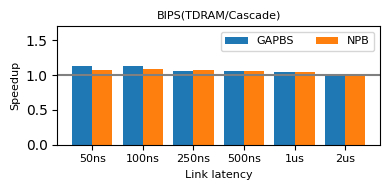

In [80]:

g = []
n = []

bips_g_cas = df_g_cas_50ns['BIPS'].astype(float)
bips_g_ram = df_g_ram_50ns['BIPS'].astype(float)
bips_n_cas = df_n_cas_50ns['BIPS'].astype(float)
bips_n_ram = df_n_ram_50ns['BIPS'].astype(float)


g.append(gmean(bips_g_ram,6) / gmean(bips_g_cas, 6))
n.append(gmean(bips_n_ram,5) / gmean(bips_n_cas, 5))


bips_g_cas = df_g_cas_100ns['BIPS'].astype(float)
bips_g_ram = df_g_ram_100ns['BIPS'].astype(float)
bips_n_cas = df_n_cas_100ns['BIPS'].astype(float)
bips_n_ram = df_n_ram_100ns['BIPS'].astype(float)


g.append(gmean(bips_g_ram,6) / gmean(bips_g_cas, 6))
n.append(gmean(bips_n_ram,5) / gmean(bips_n_cas, 5))

bips_g_cas = df_g_cas_250ns['BIPS'].astype(float)
bips_g_ram = df_g_ram_250ns['BIPS'].astype(float)
bips_n_cas = df_n_cas_250ns['BIPS'].astype(float)
bips_n_ram = df_n_ram_250ns['BIPS'].astype(float)


g.append(gmean(bips_g_ram,6) / gmean(bips_g_cas, 6))
n.append(gmean(bips_n_ram,5) / gmean(bips_n_cas, 5))

bips_g_cas = df_g_cas_500ns['BIPS'].astype(float)
bips_g_ram = df_g_ram_500ns['BIPS'].astype(float)
bips_n_cas = df_n_cas_500ns['BIPS'].astype(float)
bips_n_ram = df_n_ram_500ns['BIPS'].astype(float)


g.append(gmean(bips_g_ram,6) / gmean(bips_g_cas, 6))
n.append(gmean(bips_n_ram,5) / gmean(bips_n_cas, 5))

bips_g_cas = df_g_cas_1us['BIPS'].astype(float)
bips_g_ram = df_g_ram_1us['BIPS'].astype(float)
bips_n_cas = df_n_cas_1us['BIPS'].astype(float)
bips_n_ram = df_n_ram_1us['BIPS'].astype(float)


g.append(gmean(bips_g_ram,6) / gmean(bips_g_cas, 6))
n.append(gmean(bips_n_ram,5) / gmean(bips_n_cas, 5))

bips_g_cas = df_g_cas_2us['BIPS'].astype(float)
bips_g_ram = df_g_ram_2us['BIPS'].astype(float)
bips_n_cas = df_n_cas_2us['BIPS'].astype(float)
bips_n_ram = df_n_ram_2us['BIPS'].astype(float)


g.append(gmean(bips_g_ram,6) / gmean(bips_g_cas, 6))
n.append(gmean(bips_n_ram,5) / gmean(bips_n_cas, 5))

x = ['50ns', '100ns', '250ns', '500ns', '1us', '2us']
x_axis = np.arange(6)

# Multi bar Chart
fig = plt.figure()
fig.set_size_inches(4,2)

plt.ylim([0,1.7])
len = 0.4
plt.bar(x_axis-len, g, width=len, label = 'GAPBS')
plt.bar(x_axis, n, width=len, label = 'NPB')

plt.xticks(x_axis-(len/2), x, fontsize=8)
plt.axhline(y=1, color='gray')

plt.title("BIPS(TDRAM/Cascade)", fontsize=8)
plt.xlabel("Link latency", fontsize=8)
plt.ylabel("Speedup", fontsize=8)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()